In [1]:
!unzip data_berka.zip

Archive:  data_berka.zip
replace trans.asc? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [0]:
import numpy as np
import pandas as pd
import datetime

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [0]:
# reference dates.
start_date = datetime.datetime(1993,1,1)
end_date = datetime.datetime(2000,1,1)

In [0]:
# function for plotting histogram.
def histogram(df, col_name, bins):
    plt.hist(df[col_name], alpha=0.5, label=col_name, bins=bins)
    plt.legend(loc='upper right')
    plt.show()

# function to convert a date to age at end_date.
def convert_to_age_days(x):
    td = end_date - x
    return td.days

# function to convert a date to days after start_date.
def convert_date_to_days(x):
    td = x - start_date
    return td.days

In [34]:
# read in card dataset.
card_df = pd.read_csv('card.asc', sep=';')
card_df.head()

,card_id,disp_id,type,issued
0,1005,9285,classic,931107 00:00:00
1,104,588,classic,940119 00:00:00
2,747,4915,classic,940205 00:00:00
3,70,439,classic,940208 00:00:00
4,577,3687,classic,940215 00:00:00


In [35]:
# issued is supposed to be a date. Will convert it.
card_df.dtypes

card_id     int64
disp_id     int64
type       object
issued     object
dtype: object

In [0]:
# convert issued to datetime object.
card_df['issued'] = pd.to_datetime(card_df['issued'].str[:6], format='%y%m%d')

In [37]:
# check datatypes after conversion.
card_df.dtypes

card_id             int64
disp_id             int64
type               object
issued     datetime64[ns]
dtype: object

In [38]:
# check converted column for any null values.
card_df['issued'].isnull().sum()

0

In [0]:
# convert date to days.
card_df['card_issued_date'] = card_df['issued'].map(convert_date_to_days)
del card_df['issued']

In [40]:
# card_issued_date is now an int64.
card_df.dtypes

card_id              int64
disp_id              int64
type                object
card_issued_date     int64
dtype: object

In [41]:
# rename columns to better names.
card_df = card_df.rename(columns={'type': 'card_type'})
card_df.head()

,card_id,disp_id,card_type,card_issued_date
0,1005,9285,classic,310
1,104,588,classic,383
2,747,4915,classic,400
3,70,439,classic,403
4,577,3687,classic,410


In [42]:
# examine client dataset.
client_df = pd.read_csv('client.asc', sep=';')
client_df = client_df.rename(columns={'district_id': 'client_district_id'})

client_df.head()

,client_id,birth_number,client_district_id
0,1,706213,18
1,2,450204,1
2,3,406009,1
3,4,561201,5
4,5,605703,5


In [43]:
client_df.dtypes

client_id             int64
birth_number          int64
client_district_id    int64
dtype: object

In [0]:
# functions that process the format of the birth_number.

# returns the middle two digits of a six digit integer.
def get_mid2_dig(x):
    return int(x/100) % 100

# returns the month of birth_number.
def get_month(x):
    mth = get_mid2_dig(x)
    if mth > 50:
        return mth - 50
    else:
        return mth

# returns the month of birth_number.
def get_day(x):
    return x % 100

# returns the year of birth_number.
def get_year(x):
    return int(x/10000)

# returns the gender by examining birth_number.
def get_gender(x):
    mth = get_mid2_dig(x)
    if mth > 50:
        return 'F'
    else:
        return 'M'

# converts the birth_number into a date.
def convert_int_to_date(x):
    yr = get_year(x) + 1900
    mth = get_month(x)
    day = get_day(x)
    return datetime.datetime(yr, mth, day)

# converts birth_number into age.
def convert_birthday_to_age(x):
    yr = get_year(x) + 1900
    mth = get_month(x)
    day = get_day(x)
    return convert_to_age_days(datetime.datetime(yr,mth,day))/365
    
client_df['client_age'] = client_df['birth_number'].map(convert_birthday_to_age)
client_df['client_gender'] = client_df['birth_number'].map(get_gender)
del client_df['birth_number']

In [45]:
client_df.head()

,client_id,client_district_id,client_age,client_gender
0,1,18,29.071233,F
1,2,1,54.942466,M
2,3,1,59.268493,F
3,4,5,43.112329,M
4,5,5,39.523288,F


In [46]:
account_df = pd.read_csv('account.asc', sep=';')
account_df = account_df.rename(columns={'district_id': 'account_district_id'})

account_df.head()

,account_id,account_district_id,frequency,date
0,576,55,POPLATEK MESICNE,930101
1,3818,74,POPLATEK MESICNE,930101
2,704,55,POPLATEK MESICNE,930101
3,2378,16,POPLATEK MESICNE,930101
4,2632,24,POPLATEK MESICNE,930102


In [0]:
account_df['date'] = account_df['date'].map(convert_int_to_date)
account_df['account_date_opened'] = account_df['date'].map(convert_date_to_days)
del account_df['date']

In [48]:
account_df.head()

,account_id,account_district_id,frequency,account_date_opened
0,576,55,POPLATEK MESICNE,0
1,3818,74,POPLATEK MESICNE,0
2,704,55,POPLATEK MESICNE,0
3,2378,16,POPLATEK MESICNE,0
4,2632,24,POPLATEK MESICNE,1


In [49]:
account_df['frequency'].value_counts()

POPLATEK MESICNE      4167
POPLATEK TYDNE         240
POPLATEK PO OBRATU      93
Name: frequency, dtype: int64

In [0]:
# translate frequency to english.
def convert_freq_to_eng(x):
    if x == 'POPLATEK MESICNE':
        return 'MONTHLY'
    elif x == 'POPLATEK TYDNE':
        return 'WEEKLY'
    elif x == 'POPLATEK PO OBRATU':
        return 'TRANSACTION'
    else:
        return 'UNKNOWN'
    
account_df['frequency'] = account_df['frequency'].map(convert_freq_to_eng)

In [51]:
account_df = account_df.rename(columns={'frequency': 'statement_freq'})
account_df.head()

,account_id,account_district_id,statement_freq,account_date_opened
0,576,55,MONTHLY,0
1,3818,74,MONTHLY,0
2,704,55,MONTHLY,0
3,2378,16,MONTHLY,0
4,2632,24,MONTHLY,1


In [52]:
# rename disp_type.
disp_df = pd.read_csv('disp.asc', sep=';')

disp_df = disp_df.rename(columns={'type': 'disp_type'})
disp_df.head()

,disp_id,client_id,account_id,disp_type
0,1,1,1,OWNER
1,2,2,2,OWNER
2,3,3,2,DISPONENT
3,4,4,3,OWNER
4,5,5,3,DISPONENT


In [53]:
disp_df['disp_type'].value_counts()

OWNER        4500
DISPONENT     869
Name: disp_type, dtype: int64

In [54]:
district_df = pd.read_csv('district.asc', sep=';')

# rename A1 so it is clear that it is district_id.
district_df = district_df.rename(columns={'A1':'district_id', 'A2':'district_name', 'A3':'region', 'A4':'num_inhabitants', 'A5':'num_munipalities_gt499',
 'A6':'num_munipalities_500to1999', 'A7':'num_munipalities_2000to9999', 'A8':'num_munipalities_gt10000',
 'A9':'num_cities', 'A10':'ratio_urban', 'A11':'average_salary', 'A12':'unemp_rate95', 'A13': 'unemp_rate96',
 'A14':'num_entrep_per1000', 'A15':'num_crimes95', 'A16':'num_crimes96'})


district_df.head()

,district_id,district_name,region,num_inhabitants,num_munipalities_gt499,num_munipalities_500to1999,num_munipalities_2000to9999,num_munipalities_gt10000,num_cities,ratio_urban,average_salary,unemp_rate95,unemp_rate96,num_entrep_per1000,num_crimes95,num_crimes96
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159,2674
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824,2813
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244,5892
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616,3040


In [55]:
# something wrong with unemp_rate95 and num_crimes95.
print(district_df.dtypes)
district_df['unemp_rate95'].value_counts()[50:100]
district_df['num_crimes95'].value_counts()[1:50]

def convert_question_marks(x, typ):
    if x == '?':
        return -1
    elif typ == 'float':
        return float(x)
    else:
        return int(x)
    
district_df['unemp_rate95'] = district_df['unemp_rate95'].apply(convert_question_marks, args=('float',))
district_df['num_crimes95'] = district_df['num_crimes95'].apply(convert_question_marks, args=('int',))

district_id                      int64
district_name                   object
region                          object
num_inhabitants                  int64
num_munipalities_gt499           int64
num_munipalities_500to1999       int64
num_munipalities_2000to9999      int64
num_munipalities_gt10000         int64
num_cities                       int64
ratio_urban                    float64
average_salary                   int64
unemp_rate95                    object
unemp_rate96                   float64
num_entrep_per1000               int64
num_crimes95                    object
num_crimes96                     int64
dtype: object


In [56]:
print(district_df.dtypes)

district_id                      int64
district_name                   object
region                          object
num_inhabitants                  int64
num_munipalities_gt499           int64
num_munipalities_500to1999       int64
num_munipalities_2000to9999      int64
num_munipalities_gt10000         int64
num_cities                       int64
ratio_urban                    float64
average_salary                   int64
unemp_rate95                   float64
unemp_rate96                   float64
num_entrep_per1000               int64
num_crimes95                     int64
num_crimes96                     int64
dtype: object


In [57]:
loan_df = pd.read_csv('loan.asc', sep=';')
loan_df.head()

,loan_id,account_id,date,amount,duration,payments,status
0,5314,1787,930705,96396,12,8033.0,B
1,5316,1801,930711,165960,36,4610.0,A
2,6863,9188,930728,127080,60,2118.0,A
3,5325,1843,930803,105804,36,2939.0,A
4,7240,11013,930906,274740,60,4579.0,A


In [0]:
# convert loan date to integer.
loan_df['date'] = loan_df['date'].map(convert_int_to_date)
loan_df['loan_date'] = loan_df['date'].map(convert_date_to_days)
del loan_df['date']

In [59]:
loan_df = loan_df.rename(columns={'amount': 'loan_amount', 'duration':'loan_duration', 'payments':'monthly_loan_payment', 'status':'loan_status'})
loan_df.head()

,loan_id,account_id,loan_amount,loan_duration,monthly_loan_payment,loan_status,loan_date
0,5314,1787,96396,12,8033.0,B,185
1,5316,1801,165960,36,4610.0,A,191
2,6863,9188,127080,60,2118.0,A,208
3,5325,1843,105804,36,2939.0,A,214
4,7240,11013,274740,60,4579.0,A,248


In [60]:
order_df = pd.read_csv('order.asc', sep=';')
order_df.head()

,order_id,account_id,bank_to,account_to,amount,k_symbol
0,29401,1,YZ,87144583,2452.0,SIPO
1,29402,2,ST,89597016,3372.7,UVER
2,29403,2,QR,13943797,7266.0,SIPO
3,29404,3,WX,83084338,1135.0,SIPO
4,29405,3,CD,24485939,327.0,


In [61]:
order_df['k_symbol'].value_counts()

SIPO        3502
            1379
UVER         717
POJISTNE     532
LEASING      341
Name: k_symbol, dtype: int64

In [0]:
# translate k_symbol to english.
def convert_k_symbol_to_eng(x):
    if x == 'POJISTNE':
        return 'INSURANCE_PAYMENT'
    elif x == 'SIPO':
        return 'HOUSEHOLD_PAYMENT'
    elif x == 'LEASING':
        return 'LEASING_PAYMENT'
    elif x == 'UVER':
        return 'LOAN_PAYMENT'
    else:
        return 'UNKNOWN'

In [0]:
order_df['order_k_symbol'] = order_df['k_symbol'].map(convert_k_symbol_to_eng)
del order_df['k_symbol']

In [64]:
order_df = order_df.rename(columns={'bank_to': 'order_bank_to', 'account_to':'order_account_to', 'amount':'order_amount'})
order_df.head()

,order_id,account_id,order_bank_to,order_account_to,order_amount,order_k_symbol
0,29401,1,YZ,87144583,2452.0,HOUSEHOLD_PAYMENT
1,29402,2,ST,89597016,3372.7,LOAN_PAYMENT
2,29403,2,QR,13943797,7266.0,HOUSEHOLD_PAYMENT
3,29404,3,WX,83084338,1135.0,HOUSEHOLD_PAYMENT
4,29405,3,CD,24485939,327.0,UNKNOWN


In [65]:
trans_df = pd.read_csv('trans.asc', sep=';', low_memory=False)
trans_df.head()

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,695247,2378,930101,PRIJEM,VKLAD,700.0,700.0,NaN,NaN,NaN
1,171812,576,930101,PRIJEM,VKLAD,900.0,900.0,NaN,NaN,NaN
2,207264,704,930101,PRIJEM,VKLAD,1000.0,1000.0,NaN,NaN,NaN
3,1117247,3818,930101,PRIJEM,VKLAD,600.0,600.0,NaN,NaN,NaN
4,579373,1972,930102,PRIJEM,VKLAD,400.0,400.0,NaN,NaN,NaN


In [66]:
trans_df['k_symbol'].value_counts()

UROK           183114
SLUZBY         155832
SIPO           118065
                53433
DUCHOD          30338
POJISTNE        18500
UVER            13580
SANKC. UROK      1577
Name: k_symbol, dtype: int64

In [0]:
def convert_trans_type_to_eng(x):
    if x == 'PRIJEM':
        return 'CREDIT'
    elif x == 'VYDAJ':
        return 'WITHDRAWAL'
    else:
        return 'UNKNOWN'
    
def convert_trans_op_to_eng(x):
    if x == 'VYBER KARTOU':
        return 'CC_WITHDRAWAL'
    elif x == 'VKLAD':
        return 'CREDIT_IN_CASH'
    elif x == 'PREVOD Z UCTU':
        return 'COLLECTION_FROM_OTHER_BANK'
    elif x == 'VYBER':
        return 'WITHDRAWAL_IN_CASH'
    elif x == 'PREVOD NA UCET':
        return 'REMITTANCE_TO_OTHER_BANK'    
    else:
        return 'UNKNOWN'
    
def convert_trans_k_symbol_to_eng(x):
    if x == 'POJISTNE':
        return 'INSURANCE_PAYMENT'
    elif x == 'SLUZBY':
        return 'PAYMENT_FOR_STATEMENT'
    elif x == 'UROK':
        return 'INTEREST_CREDITED'
    elif x == 'SANKC. UROK':
        return 'SANCTION_INTEREST'
    elif x == 'SIPO':
        return 'HOUSEHOLD'
    elif x == 'DUCHOD':
        return 'OLD_AGE_PENSION'  
    elif x == 'UVER':
        return 'LOAN_PAYMENT'      
    else:
        return 'UNKNOWN'

In [0]:
trans_df['trans_type'] = trans_df['type'].map(convert_trans_type_to_eng)
trans_df['trans_operation'] = trans_df['operation'].map(convert_trans_op_to_eng)
trans_df['trans_k_symbol'] = trans_df['k_symbol'].map(convert_trans_k_symbol_to_eng)

del trans_df['type']
del trans_df['operation']
del trans_df['k_symbol']

In [69]:
trans_df['date'] = trans_df['date'].map(convert_int_to_date)
trans_df['trans_date'] = trans_df['date'].map(convert_date_to_days)
del trans_df['date']


trans_df = trans_df.rename(columns={'amount': 'trans_amount', 'balance':'balance_after_trans', 'bank':'trans_bank_partner', 'account':'trans_account_partner'})
trans_df.head(n=20)

,trans_id,account_id,trans_amount,balance_after_trans,trans_bank_partner,trans_account_partner,trans_type,trans_operation,trans_k_symbol,trans_date
0,695247,2378,700.0,700.0,NaN,NaN,CREDIT,CREDIT_IN_CASH,UNKNOWN,0
1,171812,576,900.0,900.0,NaN,NaN,CREDIT,CREDIT_IN_CASH,UNKNOWN,0
2,207264,704,1000.0,1000.0,NaN,NaN,CREDIT,CREDIT_IN_CASH,UNKNOWN,0
3,1117247,3818,600.0,600.0,NaN,NaN,CREDIT,CREDIT_IN_CASH,UNKNOWN,0
4,579373,1972,400.0,400.0,NaN,NaN,CREDIT,CREDIT_IN_CASH,UNKNOWN,1
5,771035,2632,1100.0,1100.0,NaN,NaN,CREDIT,CREDIT_IN_CASH,UNKNOWN,1
6,452728,1539,600.0,600.0,NaN,NaN,CREDIT,CREDIT_IN_CASH,UNKNOWN,2
7,725751,2484,1100.0,1100.0,NaN,NaN,CREDIT,CREDIT_IN_CASH,UNKNOWN,2
8,497211,1695,200.0,200.0,NaN,NaN,CREDIT,CREDIT_IN_CASH,UNKNOWN,2
9,232960,793,800.0,800.0,NaN,NaN,CREDIT,CREDIT_IN_CASH,UNKNOWN,2


In [70]:
loan_df.head()

,loan_id,account_id,loan_amount,loan_duration,monthly_loan_payment,loan_status,loan_date
0,5314,1787,96396,12,8033.0,B,185
1,5316,1801,165960,36,4610.0,A,191
2,6863,9188,127080,60,2118.0,A,208
3,5325,1843,105804,36,2939.0,A,214
4,7240,11013,274740,60,4579.0,A,248


Missing account ids in loan_df: 0

Loans/account: 0.15155555555555555

count     682.000000
mean     1367.233138
std       530.368738
min       185.000000
25%       914.500000
50%      1497.500000
75%      1806.500000
max      2167.000000
Name: loan_date, dtype: float64


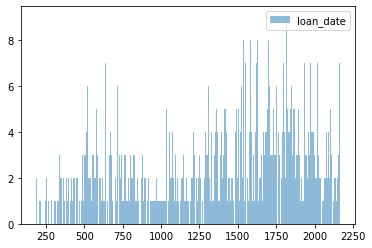

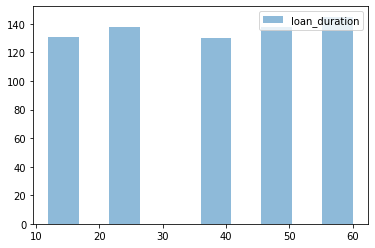

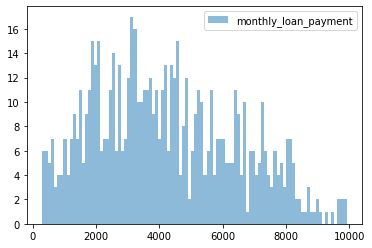

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9a21517cc0>],
      dtype=object)

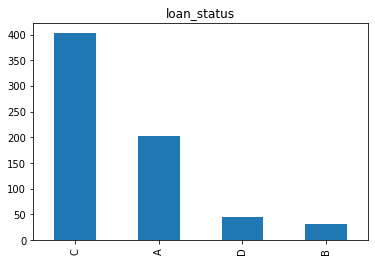

In [71]:
# data quality checks for loan.

# count how many are in loan_df but not in account_df
missing_account_ids = np.isin(loan_df['account_id'], account_df['account_id'], invert=True).sum()
print('Missing account ids in loan_df: {}'.format(missing_account_ids))

print()
# loans per account. Does this make sense?
loans_per_account = len(loan_df)/len(account_df)
print('Loans/account: {}'.format(loans_per_account))

print()

# print summary of loan_date. Earliest occurred in 1993. Latest in 1999.
print(loan_df['loan_date'].describe())

# look at date.
histogram(loan_df, 'loan_date', 300)
    
# look at loan_duration.
histogram(loan_df, 'loan_duration', 10)

# look at monthly_loan_payment.
histogram(loan_df, 'monthly_loan_payment', 100)

# look at loan_status.
#
# 'A stands for contract finished, no problems,
# 'B' stands for contract finished, loan not payed,
# 'C' stands for running contract, OK so far,
# 'D' stands for running contract, client in debt
# Seems to make sense.
#
loan_df['loan_status'].value_counts().plot(kind='bar', subplots=True)

In [72]:
trans_df.trans_operation.nunique()

6

In [73]:
trans_df.trans_operation.unique()

array(['CREDIT_IN_CASH', 'COLLECTION_FROM_OTHER_BANK',
       'WITHDRAWAL_IN_CASH', 'UNKNOWN', 'REMITTANCE_TO_OTHER_BANK',
       'CC_WITHDRAWAL'], dtype=object)

In [74]:
customer_country=trans_df[['trans_operation','account_id']].drop_duplicates()

customer_country.groupby(['trans_operation'])['account_id'].aggregate('count').reset_index().sort_values('account_id', ascending=False)

,trans_operation,account_id
2,CREDIT_IN_CASH,4500
5,WITHDRAWAL_IN_CASH,4500
4,UNKNOWN,4453
3,REMITTANCE_TO_OTHER_BANK,3602
1,COLLECTION_FROM_OTHER_BANK,1606
0,CC_WITHDRAWAL,807


In [75]:
def unique_counts(df1):
   for i in df1.columns:
       count = df1[i].nunique()
       print(i, ": ", count)
unique_counts(trans_df)

trans_id :  1056320
account_id :  4500
trans_amount :  40400
balance_after_trans :  542739
trans_bank_partner :  13
trans_account_partner :  7665
trans_type :  3
trans_operation :  6
trans_k_symbol :  8
trans_date :  2191


Missing account ids in trans_df: 0

transactions/account: 234.73777777777778



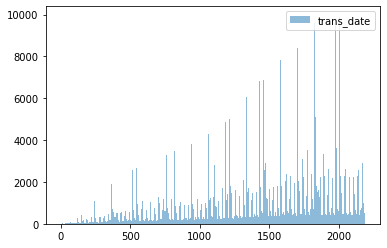

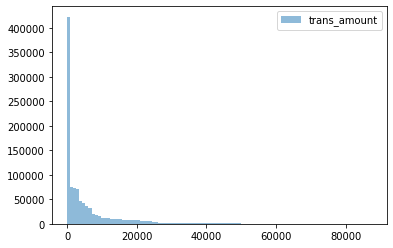

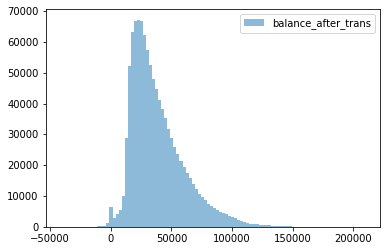

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9a205ba668>],
      dtype=object)

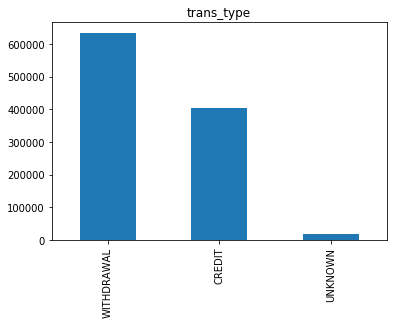

In [76]:
# data quality checks for trans_df.

# count how many are in loan_df but not in account_df
missing_account_ids = np.isin(trans_df['account_id'], account_df['account_id'], invert=True).sum()
print('Missing account ids in trans_df: {}'.format(missing_account_ids))

print()
# loans per account. Does this make sense?
trx_per_account = len(trans_df)/len(account_df)
print('transactions/account: {}'.format(trx_per_account))

print()

# look at date.
histogram(trans_df, 'trans_date', 1000)
    
# look at loan_duration.
histogram(trans_df, 'trans_amount', 100)

# look at monthly_loan_payment.
histogram(trans_df, 'balance_after_trans', 100)

# look at trans_type.
trans_df['trans_type'].value_counts().plot(kind='bar', subplots=True)

In [77]:
trans_df['trans_date'].min()

0

In [78]:
trans_df['trans_date'].max()

2190

In [79]:
trans_df.head(2)

,trans_id,account_id,trans_amount,balance_after_trans,trans_bank_partner,trans_account_partner,trans_type,trans_operation,trans_k_symbol,trans_date
0,695247,2378,700.0,700.0,NaN,NaN,CREDIT,CREDIT_IN_CASH,UNKNOWN,0
1,171812,576,900.0,900.0,NaN,NaN,CREDIT,CREDIT_IN_CASH,UNKNOWN,0


In [0]:
import datetime as dt
NOW = dt.datetime(2011,12,10)

In [0]:
trans_df['NOW'] = NOW

In [0]:
trans_df['new_trans_data'] = (pd.to_datetime(trans_df['NOW'])) + trans_df['trans_date'].map(dt.timedelta) #+ datetime.timedelta(days=trans_df['trans_date'].values)

In [83]:
trans_df['new_trans_data'].max()

Timestamp('2017-12-08 00:00:00')

In [0]:
NOW = dt.datetime(2017,12,8)

In [0]:
rfmTable = trans_df.groupby('account_id').agg({'new_trans_data': lambda x: (NOW - x.max()).days, 'trans_id': lambda x: len(x), 'trans_amount': lambda x: x.sum()})

In [0]:
rfmTable['new_trans_data'] = rfmTable['new_trans_data'].astype(int)
rfmTable.rename(columns={'new_trans_data': 'recency', 
                         'trans_id': 'frequency', 
                         'trans_amount': 'monetary_value'}, inplace=True)

In [87]:
rfmTable.head(5)

,recency,frequency,monetary_value
account_id,,,
1,0,239,375174.5
2,0,478,3151479.3
3,0,117,295021.8
4,0,186,350971.4
5,0,84,166881.4


In [88]:
rfmTable['frequency'].value_counts()

189    25
105    25
144    25
130    24
158    23
       ..
549     1
545     1
541     1
529     1
637     1
Name: frequency, Length: 569, dtype: int64

In [89]:
rfmTable[rfmTable['frequency']<=10]

,recency,frequency,monetary_value
account_id,,,
182,349,9,29400.0


In [0]:
first_customer = trans_df[trans_df['account_id']==182]

In [91]:
first_customer

,trans_id,account_id,trans_amount,balance_after_trans,trans_bank_partner,trans_account_partner,trans_type,trans_operation,trans_k_symbol,trans_date,NOW,new_trans_data
368985,54474,182,200.0,200.0,NaN,NaN,CREDIT,CREDIT_IN_CASH,UNKNOWN,1331,2011-12-10,2015-08-02
534071,54549,182,10700.0,10900.0,NaN,NaN,CREDIT,CREDIT_IN_CASH,UNKNOWN,1571,2011-12-10,2016-03-29
555310,54550,182,4900.0,15800.0,NaN,NaN,CREDIT,CREDIT_IN_CASH,UNKNOWN,1601,2011-12-10,2016-04-28
578332,54551,182,1900.0,13900.0,NaN,NaN,WITHDRAWAL,WITHDRAWAL_IN_CASH,UNKNOWN,1631,2011-12-10,2016-05-28
601111,54552,182,2600.0,16500.0,NaN,NaN,CREDIT,CREDIT_IN_CASH,UNKNOWN,1661,2011-12-10,2016-06-27
623682,54553,182,400.0,16900.0,NaN,NaN,CREDIT,CREDIT_IN_CASH,UNKNOWN,1691,2011-12-10,2016-07-27
646545,54554,182,5600.0,11300.0,NaN,NaN,WITHDRAWAL,WITHDRAWAL_IN_CASH,UNKNOWN,1721,2011-12-10,2016-08-26
670172,54555,182,900.0,12200.0,NaN,NaN,CREDIT,CREDIT_IN_CASH,UNKNOWN,1751,2011-12-10,2016-09-25
756145,54556,182,2200.0,10000.0,NaN,NaN,WITHDRAWAL,WITHDRAWAL_IN_CASH,UNKNOWN,1841,2011-12-10,2016-12-24


In [0]:
quantiles = rfmTable.quantile(q=[0.20, 0.40, 0.60, 0.80])
quantiles = quantiles.to_dict()

In [0]:
segmented_rfm = rfmTable

In [0]:
def RScore(x,p,d):
    if x <= d[p][0.20]:
        return 1
    elif x <= d[p][0.40]:
        return 2
    elif x <= d[p][0.60]: 
        return 3
    elif x<=d[p][0.80]:
        return 4
    else:
        return 5
    
def FMScore(x,p,d):
    if x <= d[p][0.20]:
        return 5
    elif x <= d[p][0.40]:
        return 4
    elif x <= d[p][0.60]: 
        return 3
    elif x <= d[p][0.80]:
        return 2
    else:
        return 1

In [95]:
segmented_rfm['r_quartile'] = segmented_rfm['recency'].apply(RScore, args=('recency',quantiles,))
segmented_rfm['f_quartile'] = segmented_rfm['frequency'].apply(FMScore, args=('frequency',quantiles,))
segmented_rfm['m_quartile'] = segmented_rfm['monetary_value'].apply(FMScore, args=('monetary_value',quantiles,))

segmented_rfm.head()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile
account_id,,,,,,
1,0,239,375174.5,1,3,4
2,0,478,3151479.3,1,1,1
3,0,117,295021.8,1,5,5
4,0,186,350971.4,1,3,5
5,0,84,166881.4,1,5,5


In [96]:
segmented_rfm['RFMScore'] = segmented_rfm.r_quartile.map(str) + segmented_rfm.f_quartile.map(str) + segmented_rfm.m_quartile.map(str)
segmented_rfm.head()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
account_id,,,,,,,
1,0,239,375174.5,1,3,4,134
2,0,478,3151479.3,1,1,1,111
3,0,117,295021.8,1,5,5,155
4,0,186,350971.4,1,3,5,135
5,0,84,166881.4,1,5,5,155


In [97]:
segmented_rfm[segmented_rfm['RFMScore']=='111'].sort_values('monetary_value', ascending=False).head(10)

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
account_id,,,,,,,
212,0,432,7619102.4,1,1,1,111
3521,0,429,7401229.2,1,1,1,111
2762,0,634,7399357.6,1,1,1,111
1132,0,414,7386440.3,1,1,1,111
2838,0,567,7365804.7,1,1,1,111
456,0,387,7338613.4,1,1,1,111
2219,0,488,7333024.6,1,1,1,111
1032,0,401,7327494.1,1,1,1,111
5228,0,454,7117524.8,1,1,1,111


In [98]:
segmented_rfm.groupby('RFMScore').agg('monetary_value').mean()

RFMScore
111    4.007836e+06
112    1.791593e+06
113    9.313901e+05
114    5.048583e+05
115    3.353181e+05
121    3.328969e+06
122    1.768844e+06
123    8.760257e+05
124    5.377307e+05
125    3.143811e+05
131    2.855760e+06
132    1.707209e+06
133    9.590106e+05
134    5.049854e+05
135    2.695367e+05
141    2.610505e+06
142    1.614433e+06
143    9.408243e+05
144    4.918672e+05
145    2.584321e+05
152    1.467460e+06
153    8.867182e+05
154    5.192728e+05
155    1.875684e+05
511    4.388078e+06
512    1.451880e+06
521    3.342149e+06
522    1.806359e+06
523    9.205044e+05
524    5.393256e+05
531    2.708148e+06
532    1.874492e+06
533    8.663352e+05
542    1.472936e+06
543    1.029564e+06
544    5.658779e+05
545    2.349443e+05
552    1.303179e+06
553    9.743027e+05
554    5.398341e+05
555    1.158910e+05
Name: monetary_value, dtype: float64

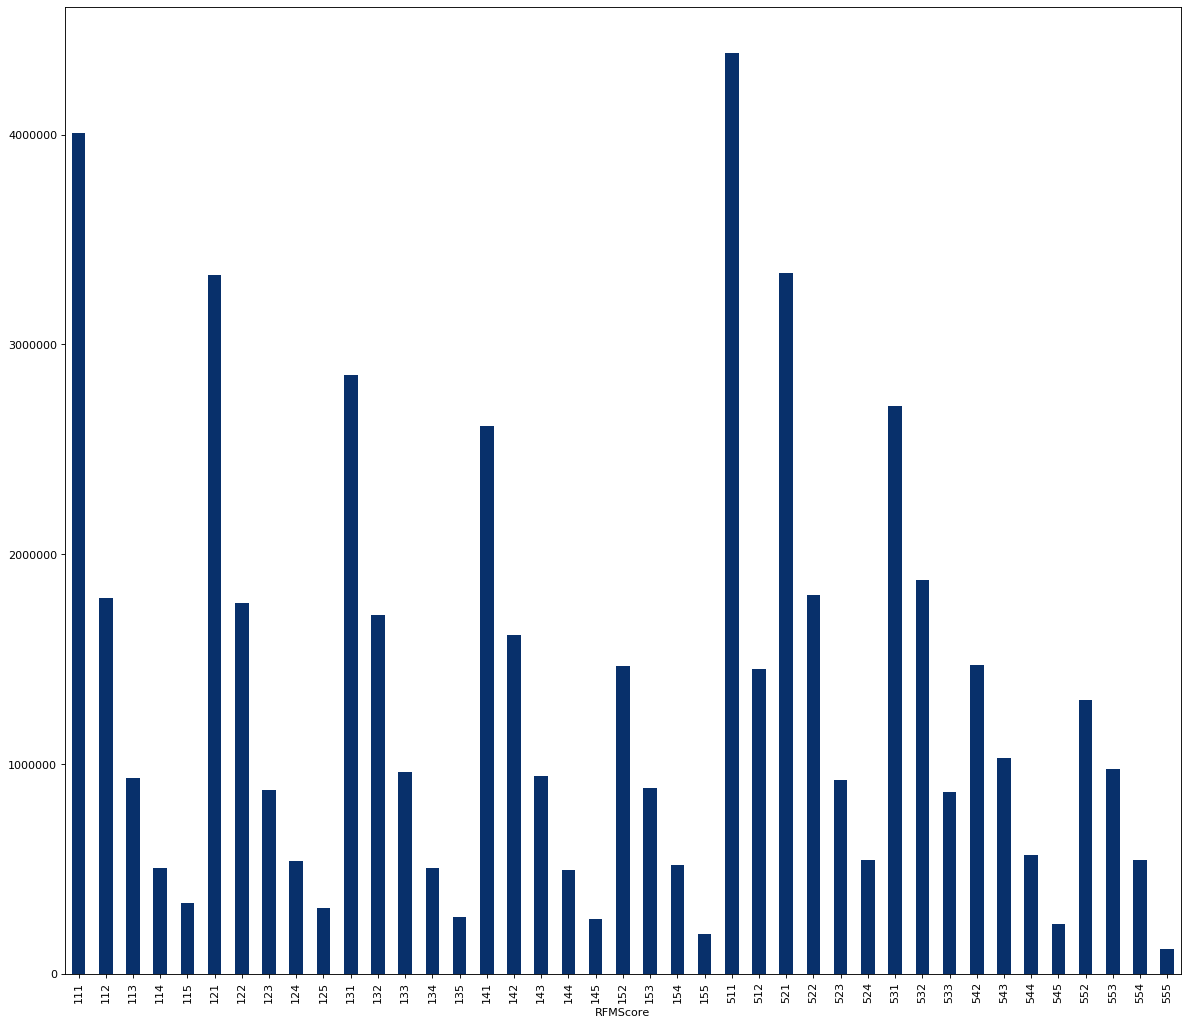

In [99]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
segmented_rfm.groupby('RFMScore').agg('monetary_value').mean().plot(kind='bar', colormap='Blues_r')
plt.show()

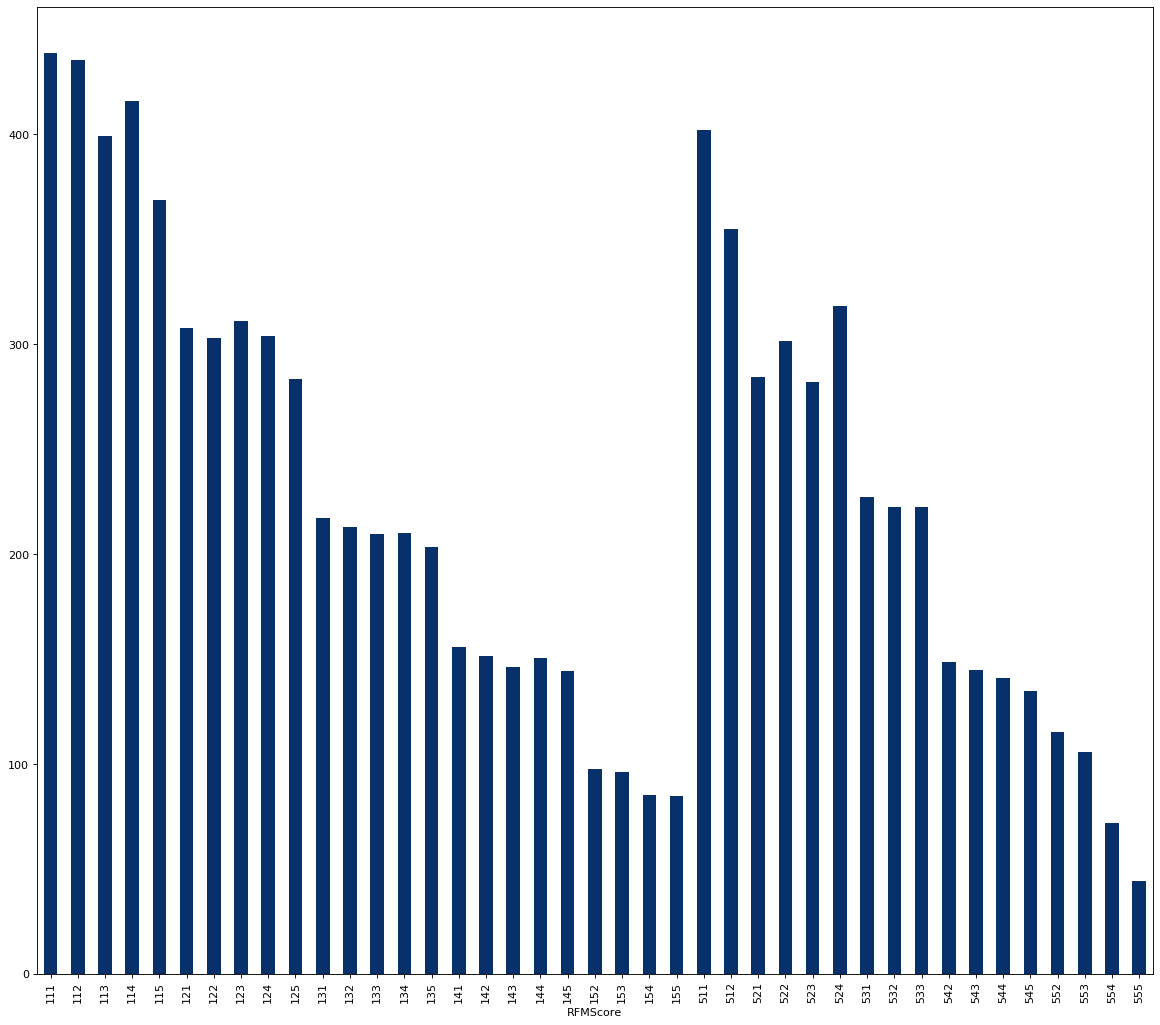

In [100]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
segmented_rfm.groupby('RFMScore').agg('frequency').mean().plot(kind='bar', colormap='Blues_r')
plt.show()

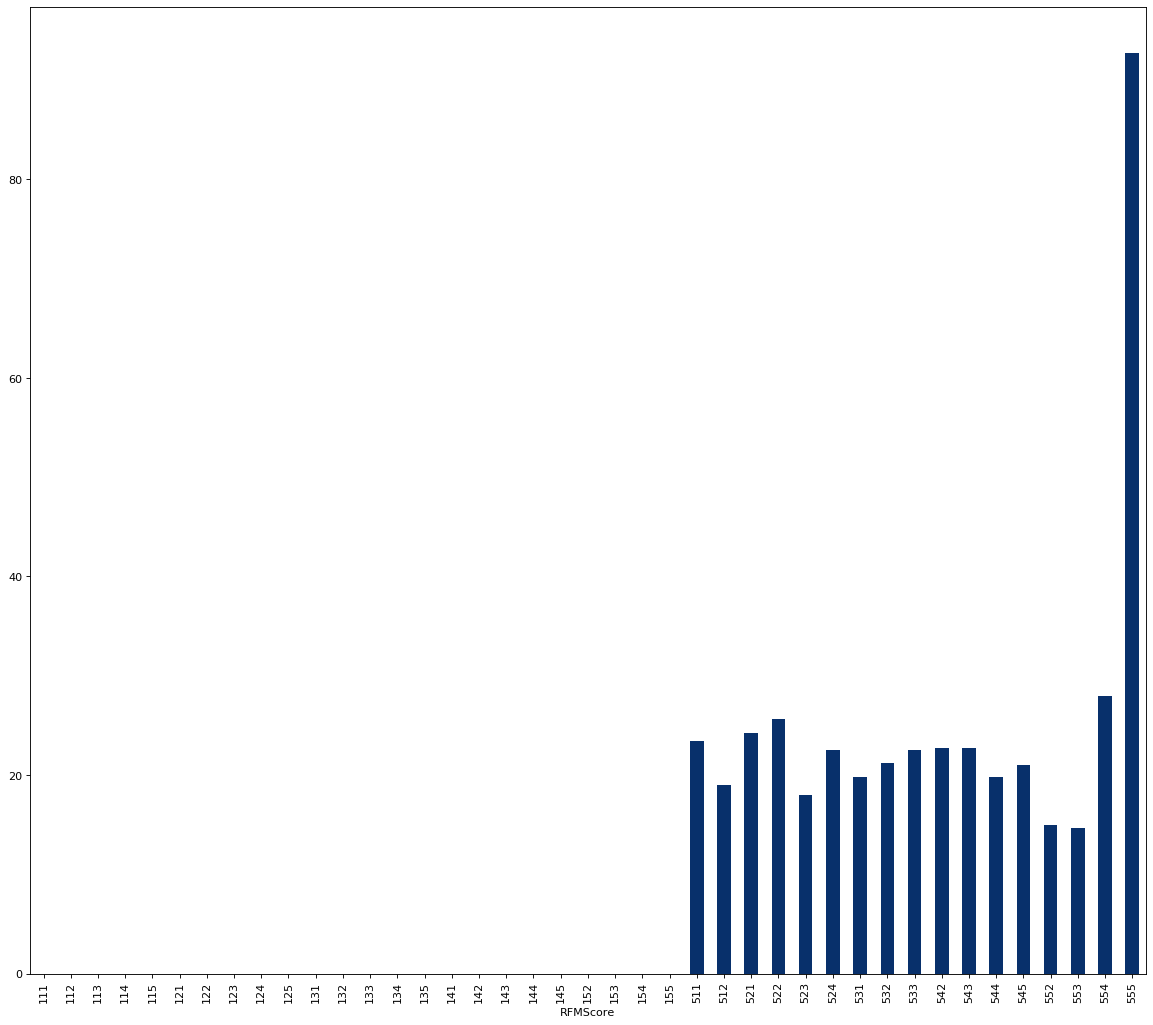

In [101]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
segmented_rfm.groupby('RFMScore').agg('recency').mean().plot(kind='bar', colormap='Blues_r')
plt.show()

In [102]:
segmented_rfm['RFMScore'].value_counts()

111    469
155    401
145    273
132    264
121    243
124    237
134    212
143    211
142    197
123    195
154    194
112    191
133    183
122    181
144    176
113    151
153    148
131    136
555    108
135     92
114     70
152     46
141     24
125     19
511     12
521     11
542     10
532      6
554      5
531      5
544      4
533      4
115      4
543      4
522      3
553      3
545      3
524      2
523      1
512      1
552      1
Name: RFMScore, dtype: int64

In [103]:
len(segmented_rfm['RFMScore'].unique())

41

In [104]:
len(trans_df.account_id.unique())

4500

In [105]:
620/4500

0.13777777777777778

In [106]:
109/4500

0.02422222222222222

In [109]:
segmented_rfm[segmented_rfm['RFMScore']=='111']

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
account_id,,,,,,,
2,0,478,3151479.3,1,1,1,111
15,0,365,2329572.9,1,1,1,111
23,0,370,3195860.0,1,1,1,111
34,0,409,4342630.5,1,1,1,111
36,0,388,2793004.2,1,1,1,111
...,...,...,...,...,...,...,...
11021,0,499,5041763.7,1,1,1,111
11111,0,492,5552105.3,1,1,1,111
11295,0,563,2880850.7,1,1,1,111


In [110]:
469/4500

0.10422222222222222

In [112]:
trans_df

,trans_id,account_id,trans_amount,balance_after_trans,trans_bank_partner,trans_account_partner,trans_type,trans_operation,trans_k_symbol,trans_date,NOW,new_trans_data
0,695247,2378,700.0,700.0,NaN,NaN,CREDIT,CREDIT_IN_CASH,UNKNOWN,0,2011-12-10,2011-12-10
1,171812,576,900.0,900.0,NaN,NaN,CREDIT,CREDIT_IN_CASH,UNKNOWN,0,2011-12-10,2011-12-10
2,207264,704,1000.0,1000.0,NaN,NaN,CREDIT,CREDIT_IN_CASH,UNKNOWN,0,2011-12-10,2011-12-10
3,1117247,3818,600.0,600.0,NaN,NaN,CREDIT,CREDIT_IN_CASH,UNKNOWN,0,2011-12-10,2011-12-10
4,579373,1972,400.0,400.0,NaN,NaN,CREDIT,CREDIT_IN_CASH,UNKNOWN,1,2011-12-10,2011-12-11
...,...,...,...,...,...,...,...,...,...,...,...,...
1056315,3626622,2906,62.3,13729.4,NaN,NaN,CREDIT,UNKNOWN,INTEREST_CREDITED,2190,2011-12-10,2017-12-08
1056316,3627616,2935,81.3,19544.9,NaN,NaN,CREDIT,UNKNOWN,INTEREST_CREDITED,2190,2011-12-10,2017-12-08
1056317,3625403,2869,60.2,14638.2,NaN,NaN,CREDIT,UNKNOWN,INTEREST_CREDITED,2190,2011-12-10,2017-12-08
1056318,3626683,2907,107.5,23453.0,NaN,NaN,CREDIT,UNKNOWN,INTEREST_CREDITED,2190,2011-12-10,2017-12-08


In [115]:
account_df

,account_id,account_district_id,statement_freq,account_date_opened
0,576,55,MONTHLY,0
1,3818,74,MONTHLY,0
2,704,55,MONTHLY,0
3,2378,16,MONTHLY,0
4,2632,24,MONTHLY,1
...,...,...,...,...
4495,124,55,MONTHLY,1822
4496,3958,59,MONTHLY,1822
4497,777,30,MONTHLY,1822
4498,1573,63,MONTHLY,1823


In [114]:
client_df

,client_id,client_district_id,client_age,client_gender
0,1,18,29.071233,F
1,2,1,54.942466,M
2,3,1,59.268493,F
3,4,5,43.112329,M
4,5,5,39.523288,F
...,...,...,...,...
5364,13955,1,54.208219,F
5365,13956,1,56.778082,M
5366,13968,61,31.739726,M
5367,13971,67,37.227397,F


In [118]:
disp_df

,disp_id,client_id,account_id,disp_type
0,1,1,1,OWNER
1,2,2,2,OWNER
2,3,3,2,DISPONENT
3,4,4,3,OWNER
4,5,5,3,DISPONENT
...,...,...,...,...
5364,13647,13955,11349,OWNER
5365,13648,13956,11349,DISPONENT
5366,13660,13968,11359,OWNER
5367,13663,13971,11362,OWNER


In [0]:
seg_df = segmented_rfm[segmented_rfm['RFMScore']=='111'].reset_index()

In [169]:
seg_df.shape

(469, 8)

In [0]:
new_df = seg_df.merge(disp_df[disp_df['disp_type']=='OWNER'] , how='left', on='account_id')

In [171]:
new_df.shape

(469, 11)

In [172]:
new_df.head(2)

,account_id,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore,disp_id,client_id,disp_type
0,2,0,478,3151479.3,1,1,1,111,2,2,OWNER
1,15,0,365,2329572.9,1,1,1,111,20,20,OWNER


In [0]:
new_df = new_df.merge(client_df, how='left', on='client_id')

In [174]:
new_df.shape

(469, 14)

In [175]:
new_df.head(2)

,account_id,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore,disp_id,client_id,disp_type,client_district_id,client_age,client_gender
0,2,0,478,3151479.3,1,1,1,111,2,2,OWNER,1,54.942466,M
1,15,0,365,2329572.9,1,1,1,111,20,20,OWNER,46,21.005479,M


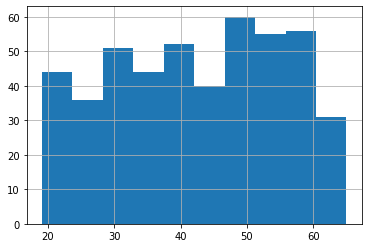

In [176]:
new_df['client_age'].hist()

In [0]:
new_df = new_df.merge(card_df, how='left', on='disp_id')

In [178]:
new_df.shape

(469, 17)

In [179]:
new_df

,account_id,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore,disp_id,client_id,disp_type,client_district_id,client_age,client_gender,card_id,card_type,card_issued_date
0,2,0,478,3151479.3,1,1,1,111,2,2,OWNER,1,54.942466,M,NaN,NaN,NaN
1,15,0,365,2329572.9,1,1,1,111,20,20,OWNER,46,21.005479,M,NaN,NaN,NaN
2,23,0,370,3195860.0,1,1,1,111,29,29,OWNER,30,48.339726,F,NaN,NaN,NaN
3,34,0,409,4342630.5,1,1,1,111,42,42,OWNER,68,64.419178,M,4.0,classic,2155.0
4,36,0,388,2793004.2,1,1,1,111,44,44,OWNER,38,22.986301,F,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,11021,0,499,5041763.7,1,1,1,111,13240,13548,OWNER,1,23.805479,M,NaN,NaN,NaN
465,11111,0,492,5552105.3,1,1,1,111,13349,13657,OWNER,59,36.665753,F,NaN,NaN,NaN
466,11295,0,563,2880850.7,1,1,1,111,13578,13886,OWNER,44,45.753425,F,NaN,NaN,NaN
467,11333,0,368,3295795.5,1,1,1,111,13623,13931,OWNER,8,58.038356,M,NaN,NaN,NaN


In [181]:
card_df

,card_id,disp_id,card_type,card_issued_date
0,1005,9285,classic,310
1,104,588,classic,383
2,747,4915,classic,400
3,70,439,classic,403
4,577,3687,classic,410
...,...,...,...,...
887,125,694,gold,2185
888,674,4360,classic,2187
889,322,2063,classic,2187
890,685,4467,classic,2188


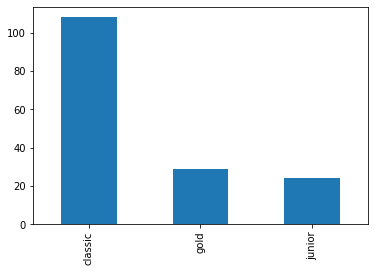

In [190]:
new_df.card_type.value_counts().plot.bar()

In [191]:
new_df.card_type.value_counts()

classic    108
gold        29
junior      24
Name: card_type, dtype: int64